
Facial Recognition using PyTorch and OpenCV

https://ritik12.medium.com/facial-recognition-using-pytorch-and-opencv-467c4e41d1f


Machine Learning - Face Recognition CNN Pytorch.ipynb
https://github.com/rubencg195/Pytorch-Tutorials/blob/master/Machine%20Learning%20-%20Face%20Recognition%20CNN%20Pytorch.ipynb



Face Recognition Using Pytorch
https://github.com/timesler/facenet-pytorch

Face Landmarks Detection With PyTorch

https://towardsdatascience.com/face-landmarks-detection-with-pytorch-4b4852f5e9c4



다중입력 deep neural network
https://rosenfelder.ai/multi-input-neural-network-pytorch/



Understanding dimensions in PyTorch
https://towardsdatascience.com/understanding-dimensions-in-pytorch-6edf9972d3be

학습하기 
https://github.com/deeplearningzerotoall/PyTorch

In [1]:
from torch.optim import lr_scheduler
from torch.nn.init import *
from torchvision import transforms, utils, datasets, models
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
import numpy as np
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
from torchvision import datasets
from torchvision.transforms import ToTensor
from FaceFeatureDataset import FaceFeatureDataset
import dlib_index

# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")


Using cuda device


In [2]:
batch_size = 30
epochs = 1000

Shape of X [N, F, C]: torch.Size([30, 2, 68])
Shape of Tensor y: torch.Size([30, 33]) torch.float32
tensor(-0.3848)
tensor(-0.3833)


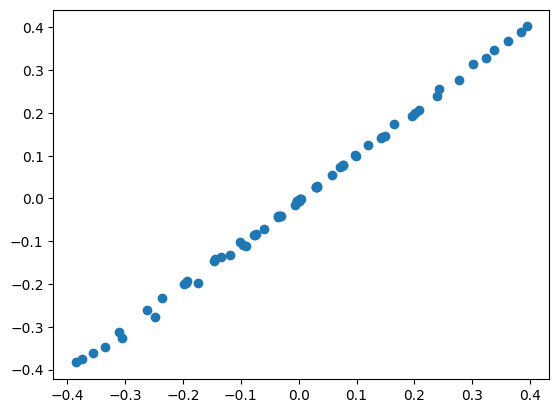

In [30]:
# Create DataLoader 
training_data = FaceFeatureDataset(feature_file="./outimg/Train/facefeature.csv", label_file="./Dataset/Train/csv/train.csv")
test_data = FaceFeatureDataset(feature_file="./outimg/Test/facefeature.csv", label_file="./Dataset/Test/csv/test.csv")

train_loader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

# 데이터 로드 확인 
for X, y in test_loader:
    print(f"Shape of X [N, F, C]: {X.shape}") # N , Channel, H= width W = height
    print(f"Shape of Tensor y: {y.shape} {y.dtype}")       
    break

print(X[0][0][0]) # X series
print(X[1][0][0]) # Y series

# plt.scatter(X[0][0], X[1][0])
plt.scatter(0.5, 0.3)
plt.show()

# -0.3848343540531417,-0.20385301634759112,
# -0.3737179919949848,-0.10460915272218729,
# -0.35550224236871286,-0.007677098905338076,
# -0.33490909967690585,0.08691035347446618,-0.3048719679799391,0.1815633891112507,-0.24878188744755736,0.2645917924482808,-0.1736726623908953,0.3288633842889521,-0.09141486232338314,0.38374017456719867,-0.006550127790904914,0.40321840189034086,0.07618315088971417,0.3896262718811785,0.16388436128658945,0.3406519747311567,0.24222356174953008,0.27980710806770515,0.30177315908762137,0.20466509138255295,0.33782755461252845,0.11283213579592033,0.36207696388098576,0.02091720113806228,0.3840309591551334,-0.08045811833920058,0.3941799681728311,-0.18191541688768886,-0.31111877320731063,-0.2788966581472728,-0.26125910208805514,-0.31868929932005585,-0.19508559579495588,-0.32767420552635385,-0.1337816463326421,-0.3154429280995321,-0.07733085788686889,-0.284356464290881,0.076166755075469,-0.28801273086753154,0.14247142788252876,-0.31588561508414914,0.2086613299898732,-0.32723151854173715,0.2770482712060567,-0.31495105367218024,0.32397309157544485,-0.2721251868640595,0.004779379852437704,-0.20823069875102473,0.001959299802285819,-0.1421391715291509,0.0015002170034238427,-0.07603124849303189,0.001024738390316915,-0.00756232820562297,-0.06070550224236859,0.0415923229010946,-0.030061725418334295,0.04888846024015048,0.0005984472199451751,0.05382360032791622,0.03134059892944985,0.0469537541592322,0.057377151950619765,0.03769011911076814,-0.23610792303611894,-0.20045908279886182,-0.19342961855620389,-0.22613492790664036,-0.14384867627911457,-0.22579061580749382,-0.10159666296957126,-0.19008053238173306,-0.14655398562955102,-0.17622606934464957,-0.19849592515793024,-0.17658677725804117,0.09908810339007568,-0.1886868881709023,0.14420938419250606,-0.22615132372088542,0.1961513237208854,-0.22579061580749393,0.23846892028740907,-0.19952452138689303,0.2005290061243188,-0.1761768819019146,0.14858706659593968,-0.1765375898153061,-0.1182384144283164,0.16633167767758117,-0.07321550851135639,0.1430332256353377,-0.032963784539711494,0.1267849737184743,-0.0023364035299222596,0.13644210830881986,0.030783141245117496,0.1272276607030911,0.0708053238173314,0.14403337030428687,0.1202550995804601,0.163265660413753,0.07511742296378476,0.20309109321502627,0.03250470174084985,0.21932294931764473,-0.0029430486569897996,0.22379900660654872,-0.03596421854655918,0.2188474707045378,-0.07598640111877308,0.20204176110334204,-0.09698943916670666,0.16647924000578684,-0.03553792737618733,0.15746154217099884,-0.0025167574866179487,0.16241307807300953,0.03056999565993168,0.1579206249698606,0.09664512706756057,0.16310170227130238,0.030520808217196493,0.16500361672373054,-0.00020494767806322756,0.16951246564112443,-0.03322611756763261,0.16456092973911374

n_total_steps = len(train_loader)
# print(f'Traing dat length {n_total_steps}')
# print(y)


In [4]:

num_classes = 33

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(68 * 2, 128),
            nn.LeakyReLU(),
            nn.Linear(128, 128),
            nn.LeakyReLU(),
            nn.Linear(128, num_classes),            
        )
    

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)


NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=136, out_features=128, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=128, out_features=33, bias=True)
  )
)


In [5]:
#criterion = nn.CrossEntropyLoss()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)


In [6]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        # Compute prediction error
        pred = model(X)        
        loss = loss_fn(pred, y)
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # print('batch',  batch)
        if batch % 10 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [7]:
# Training
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_loader, model, criterion, optimizer)    
print("Done!")

Epoch 1
-------------------------------
loss: 0.295945  [    0/  100]
Epoch 2
-------------------------------
loss: 0.286648  [    0/  100]
Epoch 3
-------------------------------
loss: 0.295373  [    0/  100]
Epoch 4
-------------------------------
loss: 0.292029  [    0/  100]
Epoch 5
-------------------------------
loss: 0.292723  [    0/  100]
Epoch 6
-------------------------------
loss: 0.292984  [    0/  100]
Epoch 7
-------------------------------
loss: 0.289150  [    0/  100]
Epoch 8
-------------------------------
loss: 0.276151  [    0/  100]
Epoch 9
-------------------------------
loss: 0.281154  [    0/  100]
Epoch 10
-------------------------------
loss: 0.271787  [    0/  100]
Epoch 11
-------------------------------
loss: 0.275508  [    0/  100]
Epoch 12
-------------------------------
loss: 0.282641  [    0/  100]
Epoch 13
-------------------------------
loss: 0.278848  [    0/  100]
Epoch 14
-------------------------------
loss: 0.267339  [    0/  100]
Epoch 15
------

In [8]:
PATH = './cifar_net.pth'
torch.save(model.state_dict(), PATH)

In [9]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    print('test size', size )
    # num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0,0
    with torch.no_grad():
        for X, y in dataloader:
            print("X Shape", X.shape)
            X, y = X.to(device), y.to(device)
            pred = model(X)
            loss = loss_fn(pred, y)            
            print('pred =', pred)
            #print('loss', loss)
            #print('real', y)



In [10]:

test(test_loader, model, criterion)

print("Done !")

test size 100
X Shape torch.Size([30, 2, 68])
pred = tensor([[0.4948, 0.4883, 0.4935, 0.5121, 0.5205, 0.5242, 0.4778, 0.5006, 0.5232,
         0.5142, 0.5230, 0.5013, 0.4974, 0.5161, 0.4857, 0.4941, 0.5157, 0.5356,
         0.4974, 0.5233, 0.5033, 0.5064, 0.5011, 0.5021, 0.5202, 0.4916, 0.5269,
         0.4921, 0.4833, 0.5074, 0.5272, 0.5202, 0.4869],
        [0.4947, 0.4882, 0.4956, 0.5138, 0.5206, 0.5239, 0.4792, 0.5007, 0.5229,
         0.5145, 0.5244, 0.5011, 0.4977, 0.5172, 0.4863, 0.4938, 0.5147, 0.5371,
         0.4966, 0.5235, 0.5034, 0.5070, 0.4993, 0.5011, 0.5214, 0.4922, 0.5292,
         0.4914, 0.4851, 0.5079, 0.5280, 0.5208, 0.4884],
        [0.4967, 0.4902, 0.4954, 0.5136, 0.5216, 0.5248, 0.4801, 0.5010, 0.5240,
         0.5163, 0.5249, 0.5021, 0.4979, 0.5177, 0.4878, 0.4953, 0.5177, 0.5363,
         0.4986, 0.5248, 0.5039, 0.5064, 0.5012, 0.5024, 0.5210, 0.4922, 0.5288,
         0.4932, 0.4851, 0.5084, 0.5297, 0.5221, 0.4887],
        [0.4968, 0.4896, 0.4957, 0.5143, 0.5

In [11]:


x_ = np.array([[
    [-0.36369685665697504, -0.21546217565417758], [-0.3574112677601623, -
                                                   0.12973942618903955], [-0.34360908442591476, -0.041386801250754224],
    [-0.32728893521312186, 0.047003126885731494], [-0.3008596192879478,
                                                   0.13302430193647485], [-0.24910143178451916, 0.20934664545504422],
    [-0.1820489330188162, 0.27330297877009146], [-0.1047753579461298,
                                                 0.32733666136376105], [-0.016907674584453414, 0.3462680344506007],
    [0.0714076471556312, 0.3349838169948983], [0.15768994459377905,
                                               0.290928739919908], [0.23164353502660584, 0.22906138570409784],
    [0.28812057710241923, 0.15686104558670244], [0.32215974546052994,
                                                 0.06921718141423006], [0.3461270503044599, -0.018575895551044996],
    [0.3676136924680454, -0.1089242415930659], [0.3790284711174502, -
                                                0.19942180042788948], [-0.29962861374732563, -0.29006857205551595],
    [-0.25378298315870307, -0.3246486367875362], [-0.19323989247901685, -
                                                  0.3313072576663558], [-0.13799385594382574, -0.3204147237917603],
    [-0.08297163859783863, -0.2944143946458938], [0.0857693784628889, -
                                                  0.2944330462449941], [0.146536288331779, -0.3161994623950847],
    [0.20970925448461253, -0.330374677711339], [0.27513906412858635, -
                                                0.3268868286795764], [0.32741949640682433, -0.2858160074606396],
    [0.00400076800702176, -0.21505184047396997], [0.0031054912502057608, -
                                                  0.1546206593888858], [-0.0002704481869548747, -0.09674474738054728],
    [-0.0037209940205167324, -0.033832903615118703], [-0.07230292391244719,
                                                      0.005447364090185869], [-0.03971858028416264, 0.01600416918097547],
    [-0.004616270777332843, 0.02659827746996546], [0.0307844643151024,
                                                   0.017048658730594135], [0.06366723352899217, 0.007461736793021978],
    [-0.2304684842832848, -0.19837731087827104], [-0.19228866092489982, -
                                                  0.22551538756925782], [-0.14192934335399632, -0.22476932360524426],
    [-0.10212683087388219, -0.19143891601294627], [-0.14767403587689942, -
                                                   0.17700257830928734], [-0.19803335344780293, -0.17774864227330067],
    [0.10182840528827686, -0.1884173569586921], [0.14263810411980915, -
                                                 0.22307202808711402], [0.19558999396565901, -0.22732459268199012],
    [0.23802238191892033, -0.20151077952712704], [0.1999171649569368, -
                                                  0.17940863459323053], [0.1470025783092873, -0.17767403587689945],
    [-0.137005321191508, 0.12285918042679256], [-0.08882824071534368,
                                                0.10090624828569872], [-0.04324373251412583, 0.08395194470349432],
    [-0.008104119809095423, 0.09202808711393928], [0.027259312085139098,
                                                   0.0849964342531132], [0.07483954139009275, 0.10333095616874222],
    [0.1299363651324813, 0.12429535355751808], [0.07649953371002238,
                                                0.16128147457348174], [0.030989631905205983, 0.17319984639859565],
    [-0.006854462669372952, 0.17767623018267586], [-0.04706731032969447,
                                                   0.17204344725437493], [-0.08961160787755773, 0.15378353173514736],
    [-0.11182566240605629, 0.12323221240879911], [-0.04624663996927969,
                                                  0.11664819792638104], [-0.008514454989302811, 0.11972571177793634],
    [0.026774370508530265, 0.11772999067420054], [0.10723736902737391,
                                                  0.1264775906522574], [0.0292550331888749, 0.1202852597509464],
    [-0.006071095507158897, 0.12479894673322722], [-0.043765977288935165, 0.1192034670031269]]], dtype=np.float32)

print(x_.shape, x_.dtype)
model.eval()
x = torch.Tensor(x_).to(device)
with torch.no_grad():
    pred = model(x)
    print(f'{pred} {pred.shape}')


(1, 68, 2) float32
tensor([[0.2590, 0.2972, 0.2939, 0.3077, 0.3555, 0.3288, 0.2748, 0.3621, 0.3410,
         0.3513, 0.2907, 0.3273, 0.3210, 0.3155, 0.3237, 0.3019, 0.3131, 0.3481,
         0.2595, 0.3279, 0.3073, 0.3428, 0.3551, 0.3274, 0.3798, 0.2514, 0.3272,
         0.3050, 0.2674, 0.3195, 0.3084, 0.3065, 0.3026]], device='cuda:0') torch.Size([1, 33])
